# 外部日除けによる日照面積率

## 計算方法

日除けによる影のx座標、y座標は下記より求められる。
$$ x=B-b^{'}-ν⋅|tan⁡γ | \\
y=H-h^{'}-w⋅tan⁡ϕ $$
ここで、
$ x $ : 影のx座標、
$ B $ : 庇の幅[m]、
$ b^{'} $ : 窓の両端から庇までの長さ[m]、
$ ν $ : 袖壁の出幅[m]、
$ ⁡γ $ : 壁面太陽方位[rad]、
$ H $ : FLから庇までの距離[m]、
$ h^{'} $ : FLから窓下端までの距離[m]、
$ w $ : 庇の出幅[m]、
$ ⁡ϕ $ : 見かけの太陽高度[rad]

![fugure](solar_shading.png) 

<style>
table, th, td {
    font-size: 90%;
}
</style>

|       |   $x<0$    | $0<x<b$          |  $x>b$      | 
| :---: | :---: | :-------: | :---: | 
| $y<0$ | $0$     | $0$         | $0$     | 
| $0<y<h$ | $0$     | $\frac{x\cdot y}{b\cdot h}$          | $\frac{y}{h}$   | 
| $y>h$   | $0$     | $\frac{x}{b}$       | 1     | 

## 日除けによる日照面積率の例題

### 太陽位置の計算、日照面積率の計算
<style>
table, th, td {
    font-size: 90%;
}
</style>

| 項目 | 内容 |
| ---- | ---- |
| 地域 | 東京（北緯35.68度、東経139.77度）|
| 計算日 | 夏至（6/21）と冬至（12/21）|
| 窓仕様 | 鉛直面。東西南北の4方位。W=3.0m H=2.5m |
| 日除けの寸法 | 庇の幅：5.0m、庇の高さ位置：FL+4.0m、窓下端：FL、庇の出幅：1.0m、袖庇の出幅：0.5m |

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

import SOPOS as sp
import solar_shading as ss

In [2]:
# 計算する時刻を設定
t_range = np.arange(start=0, stop=24, step=1, dtype=float)
# 計算結果を収録するDataFrameを定義
sunshine_area_ratio_summer = pd.DataFrame(index=t_range)
sunshine_area_ratio_winter = pd.DataFrame(index=t_range)
# 計算する方位の設定
direction_label = ['east', 'south', 'west', 'north']
direction_azimth = np.radians(np.arange(start=-90, stop=181, step=90, dtype=float))

for tt in t_range:
    # 夏至の太陽位置
    (sh_summer, sa_summer, ca_summer) = sp.SOPOS(35.68, 139.77, 6, 21, tt)

    # 太陽高度、太陽方位角の計算
    h_sun_summer = math.asin(sh_summer)
    a_sun_summer = math.asin(sa_summer)

    # 冬至の太陽位置
    (sh_winter, sa_winter, ca_winter) = sp.SOPOS(35.68, 139.77, 12, 21, tt)

    # 太陽高度、太陽方位角の計算
    h_sun_winter = math.asin(sh_winter)
    a_sun_winter = math.asin(sa_winter)

    # 日照面積率の計算
    for i, direction in enumerate(direction_azimth):
        # 夏の日照面積率
        sunshine_area_ratio_summer.loc[tt, direction_label[i]] = ss.calc_sunshine_area_ratio(
            h_sun=h_sun_summer,
            a_sun=a_sun_summer,
            window_inc=math.radians(90.0),
            window_azm=direction,
            window_width=3.0,
            window_height=3.5,
            sunshade_width=5.0,
            sunshade_height=4.0,
            bottom_margin=0.0,
            roof_depth=1.0,
            sidefin_depth=0.5)
            
        # 冬の日照面積率
        sunshine_area_ratio_winter.loc[tt, direction_label[i]] = ss.calc_sunshine_area_ratio(
            h_sun=h_sun_winter,
            a_sun=a_sun_winter,
            window_inc=math.radians(90.0),
            window_azm=direction,
            window_width=3.0,
            window_height=3.5,
            sunshade_width=5.0,
            sunshade_height=4.0,
            bottom_margin=0.0,
            roof_depth=1.0,
            sidefin_depth=0.5)


### グラフ描画

<AxesSubplot:title={'center':'sunshine area ratio[-](December 21st)'}>

findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


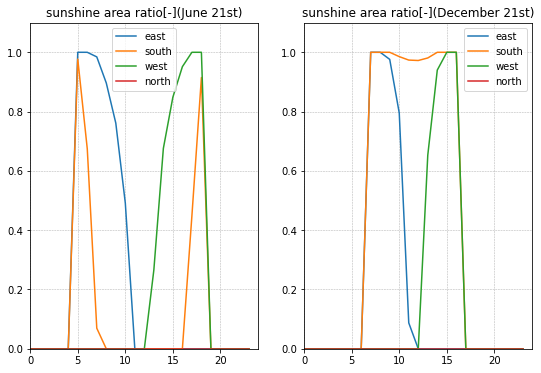

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
axes[0].set_xlim(0, 24)
axes[0].set_ylim(0, 1.1)
axes[1].set_xlim(0, 24)
axes[1].set_ylim(0, 1.1)
# 夏期グラフ
sunshine_area_ratio_summer.plot(ax=axes[0], grid=True, title='sunshine area ratio[-](June 21st)')
# 冬期グラフ
sunshine_area_ratio_winter.plot(ax=axes[1], grid=True, title='sunshine area ratio[-](December 21st)')